Izzatidiva Khairunnisa - Data Wrangling and Data Analysis

Import Library:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Membaca dataset:

In [4]:
dir='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(dir,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Memberi Nama pada setiap kolom Dataset

In [24]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-height","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,97.6,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,97.6,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450


Mengekspor Dataset ke format *CSV*

In [25]:
path ="D:\FGA DTS\.csv"
df.to_csv(path)

Cek tipe data setiap kolom

In [26]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-height            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                 object
dtype: object

Melihat Statistik Deskriptif dari Seluruh Kolom

In [27]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.0,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52.0,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,97.6,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41.0,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,9.949525,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,2.573104,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,4.795918,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,7.833333,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,9.791667,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,12.368421,34.000000,NaN


Menghapus baris yang terdapat *missing values* pada kolom "price"

In [28]:
df.dropna(subset=["price"], axis=0, inplace=True)

Merubah missing values (pada kolom "normalized-losses" dan "city-mpg") dengan nilai mean kolom tersebut

In [29]:
df["normalized-losses"] = df["normalized-losses"].replace('?',0)
rata2 = df["normalized-losses"].astype("float").mean()
df["normalized-losses"] = df["normalized-losses"].replace(0,rata2)

Merubah format  dan nama kolom "city-mpg"  menjadi "city-L/100km"

In [30]:
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city-mpg":"city-L/100km"}, inplace=True)

Merubah Tipe Data yang tidak sesuai

In [39]:
df["price"] = df["price"].replace('?',0)
df["price"] = df["price"].astype("int")
df["horsepower"] = df["horsepower"].replace('?',0)
df["horsepower"] = df["horsepower"].astype("int")
df["highway-mpg"] = df["highway-mpg"].replace('?',0)
df["highway-mpg"] = df["highway-mpg"].astype("int")

Normalisasi Data dengan Metode "Simple Feature Scaling"

In [40]:
df["length"] = df["length"]/df["length"].max()

Membuat Kolom "priced-binned" untuk menyimpan kategori dari kolom "price"  (Data Binning)

In [41]:
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
group_names = ["Low", "Medium", "High"]
df["price-binned"] = pd.cut(df["price"], bins, labels=group_names, include_lowest=True)

Merubah Variabel Kategori menjadi Variabel Kuantitatif

In [ ]:
pd.get_dummies(df["fuel-type"])

Membuat Scatter Plot untuk melihat hubungan antar variabel:

Text(0, 0.5, 'Price')

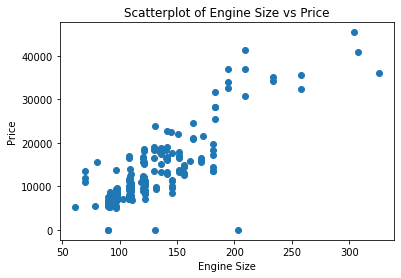

In [44]:
x = df["engine-size"]
y = df["price"]
plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

GROUP BY pada python

In [45]:
df_test = df[["drive-wheels","body-style","price"]]
df_grp = df_test.groupby(["drive-wheels","body-style"],as_index=False).mean()
df_pivot= df_grp.pivot(index="drive-wheels",columns="body-style")
df_test

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450
...,...,...,...
200,rwd,sedan,16845
201,rwd,sedan,19045
202,rwd,sedan,21485
203,rwd,sedan,22470


Melihat Perbedaan Harga 'honda' dengan 'jaguar' menggunakan metode ANOVA

In [46]:
df_anova=df[["make","price"]]
grouped_anova = df_anova.groupby(["make"])
anova_results = stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("jaguar")["price"])
print(anova_results)
print("The Prices between 'honda' and 'jaguar' are significantly different, since the F-score is very large (F=401) and the p-value is larger than 0.05 ")

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)
The Prices between 'honda' and 'jaguar' are significantly different, since the F-score is very large (F=401) and the p-value is larger than 0.05 


Melihat Plot Regresi antara variabel 'highway-mpg' dengan variabel 'price'

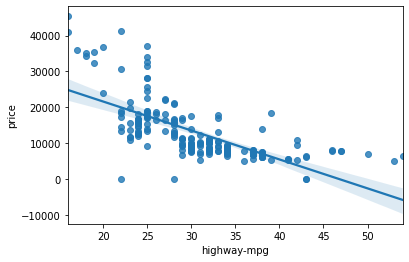

In [47]:
sns.regplot(x="highway-mpg", y="price", data=df)

Melihat Nilai Korelasi Pearson dan nilai p-value variabel 'horsepower' dengan variabel 'price'

In [48]:
#PEARSON CORRELATION
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
pearson_coef, p_value

(0.6912878787942788, 1.8175735366187956e-30)

Menghitung nilai parameter untuk membuat model regresi sederhana

In [57]:
x = df[["highway-mpg"]]
y = df[["price"]]
lm = LinearRegression()
lm.fit(x,y)
yhat = lm.predict(x)
lm.intercept_, lm.coef_

(array([37758.50562969]), array([[-806.76723574]]))

Evaluasi Model Regresi dengan membuat plot

(0.0, 48150.12680674904)

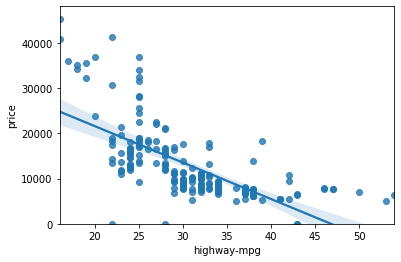

In [58]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)